In [27]:
import matplotlib.pyplot as plt

from Modules.ShapeShadow import Sector
from Modules.Beamer import MapPattern, Spot, SpotCollection

In [28]:
# Setting up dummy coordinates for the MapPattern
sector = Sector(
    radius=3.9836,
    angle_sweep=90
)
sector.rotate(225)

# Sample outline
sample = Sector(
    radius=2*2.54,
    angle_sweep=90
)
sample.rotate(225 + 4.1).translate(-0.0542, 2.8507)

# Spot
spot = Spot(diameter=0.3, angle_incident=75)
print(f"Spot minor: {spot.diameter:.2f} cm, major: {spot.elongation():.2f} cm")

# MapPattern
xoff = 0.0422
yoff = 2.0455
mp = MapPattern(sector.x, sector.y, x_offset=-xoff, y_offset=yoff, theta_offset=4.1)

# SpotCollection
sc = SpotCollection(mp, spot)

Spot minor: 0.30 cm, major: 1.16 cm


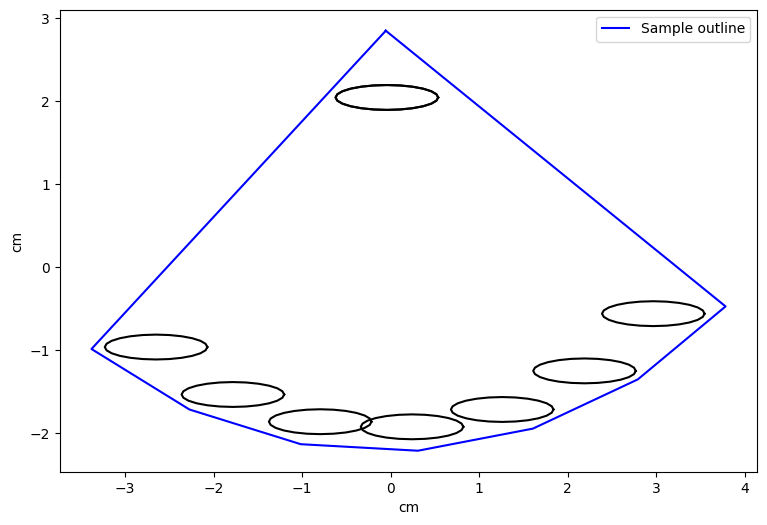

In [31]:
s = 3
fig, ax = plt.subplots(figsize=(3*s,2*s))
ax.plot(sample.x, sample.y, '-b', label='Sample outline')

for ell in sc.outlines():
    ax.plot(ell.x, ell.y, '-k')


ax.set_xlabel('cm')
ax.set_ylabel('cm')

plt.legend()
plt.show()